## Name:G.Dheekshith Kumar
## Reg No:21BPS1461
## Mail_Id:dheekshithkumar.g2021@vitstudent.ac.in
## Campus:Chennai

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Data Preprocessing and Understanding

In [24]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.shape

(200, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

### Uni Variate Analysis

<Axes: >

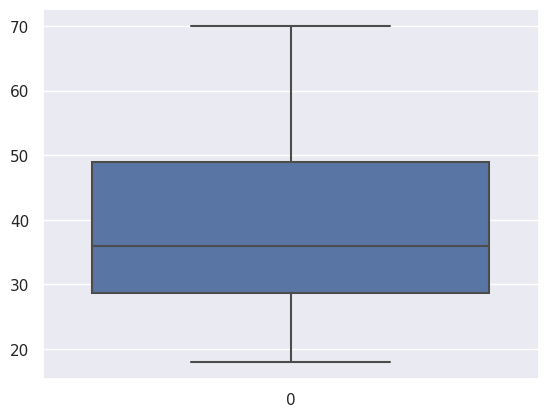

In [29]:
import seaborn as sns
sns.boxplot(df.Age)

<Axes: xlabel='Age', ylabel='Density'>

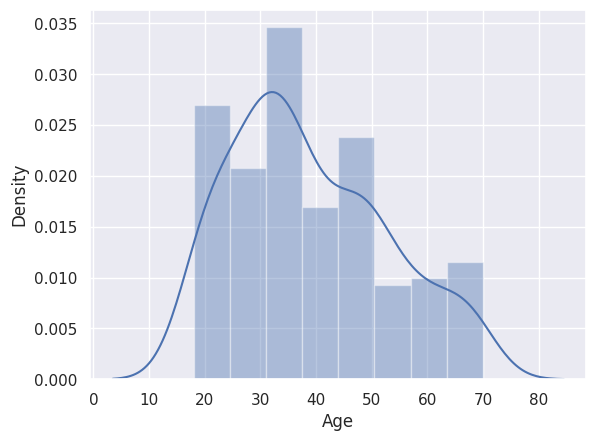

In [30]:
sns.distplot(df.Age)

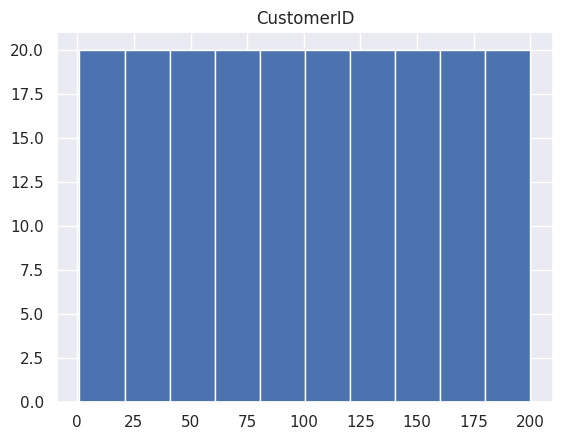

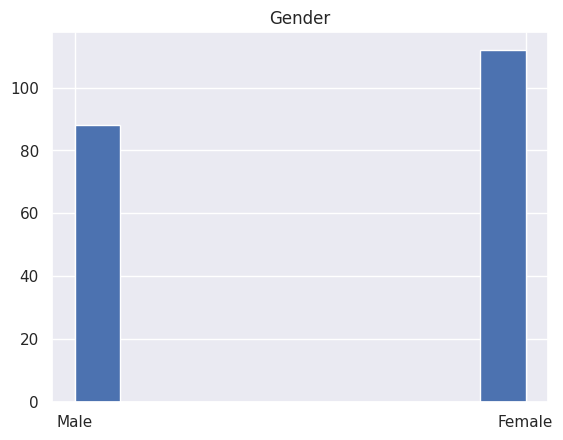

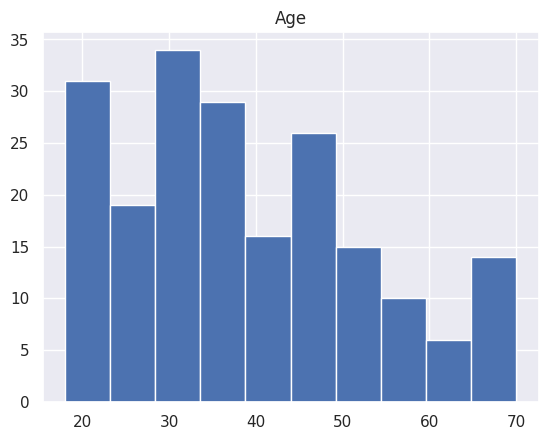

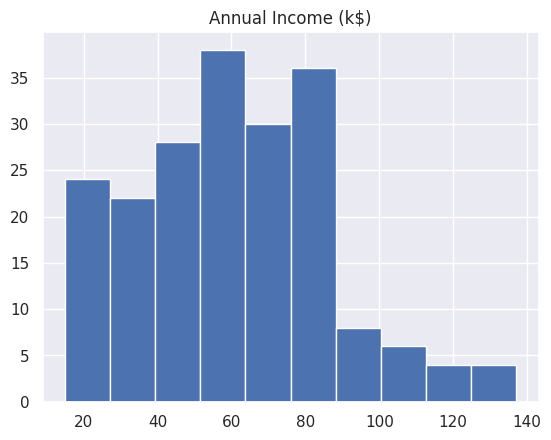

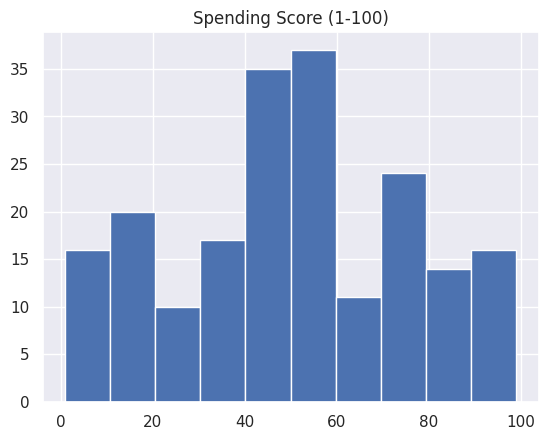

In [31]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

### Bi Variate Analysis
### Scatter Plot

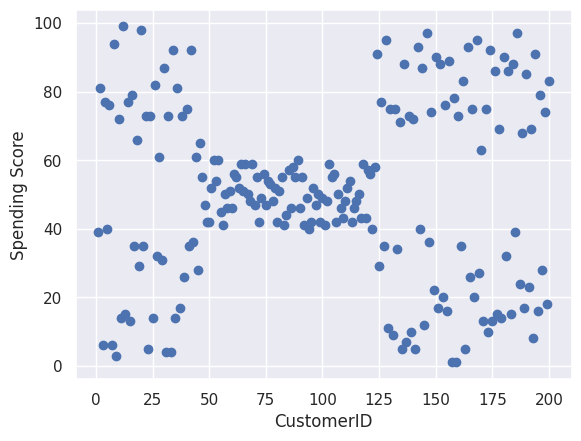

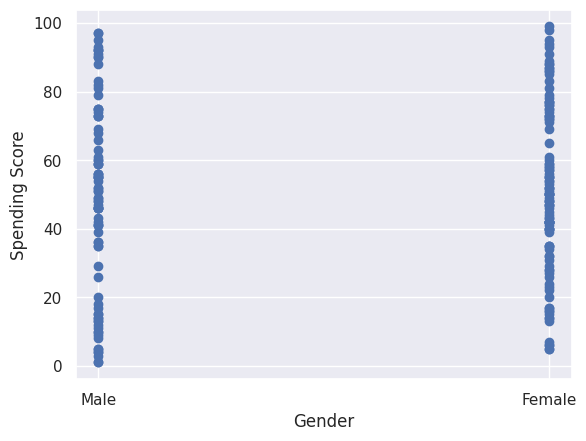

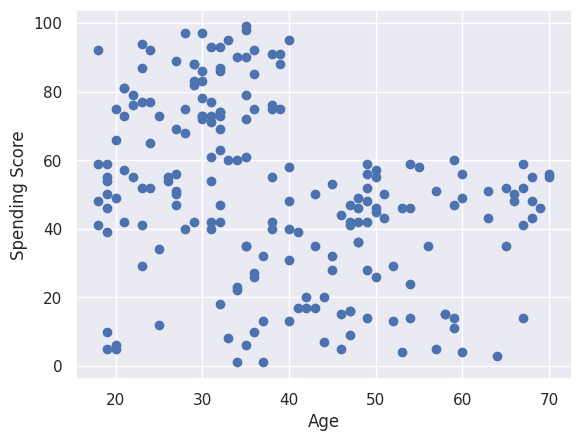

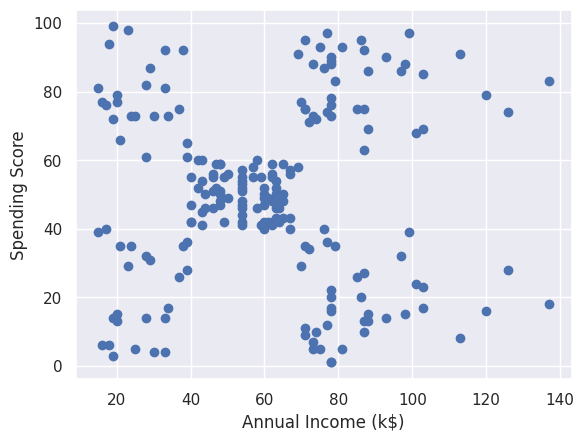

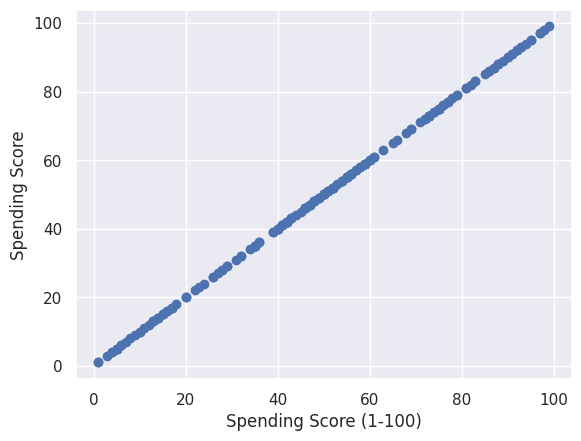

In [32]:
for i in df.columns:
  plt.scatter(df[i],df['Spending Score (1-100)'])
  plt.xlabel(i)
  plt.ylabel("Spending Score")
  plt.show()


### Multivariate Variate Analysis

### Pairplot

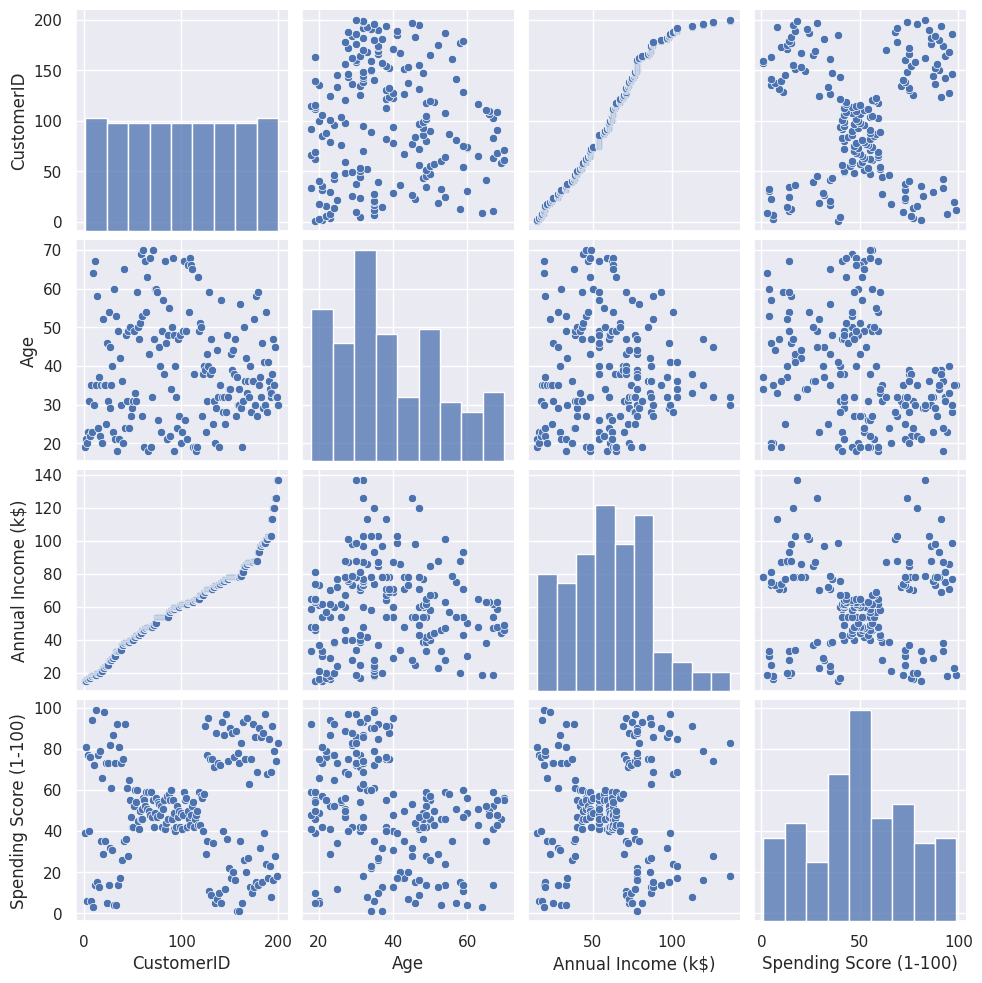

In [33]:
sns.pairplot(df)

<Axes: >

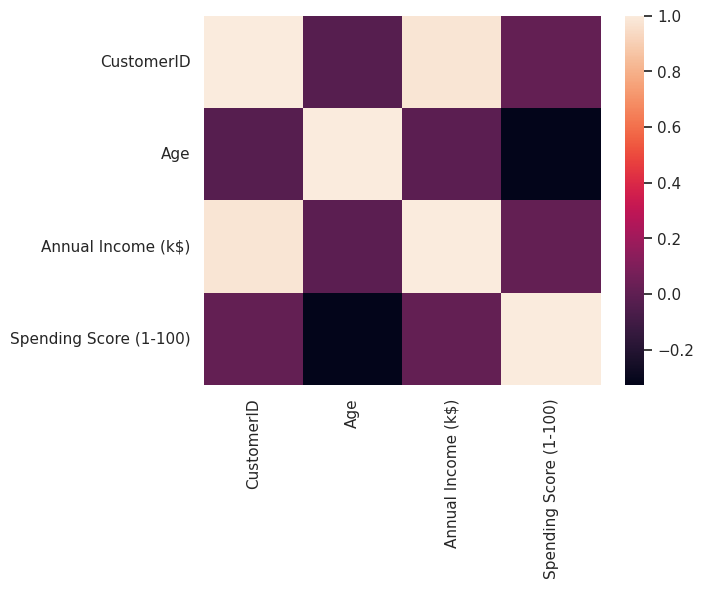

In [34]:
#heatmap
sns.heatmap(df.corr())

<Axes: >

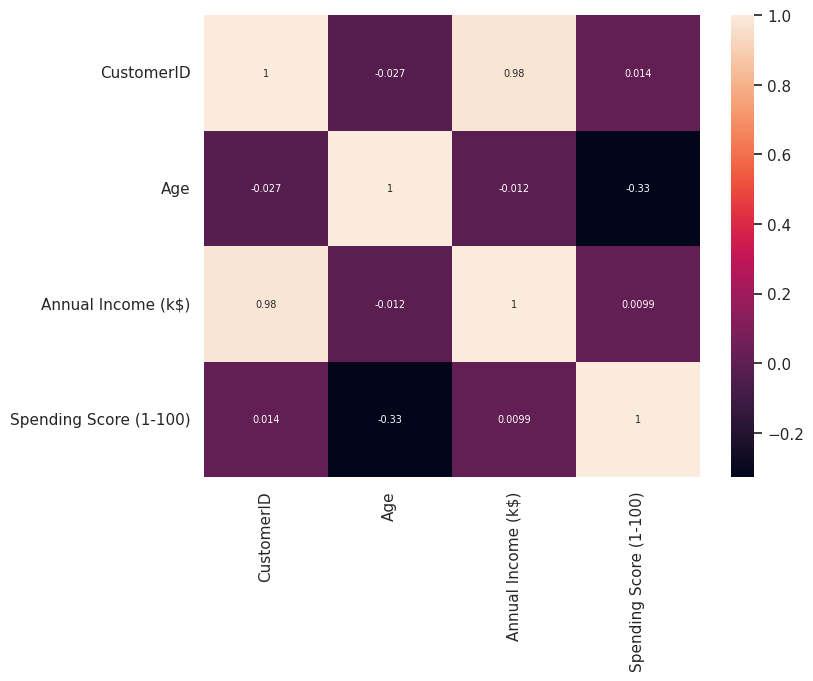

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
sns.heatmap(df.corr(),annot=True,annot_kws={"size": 7})

In [36]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Machine Learning approach with clustering algorithm

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
from sklearn.cluster import KMeans

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df.Gender = le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [41]:
error = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df.drop(columns = ['CustomerID',"Age","Gender"]))
    error.append(kmeans.inertia_)

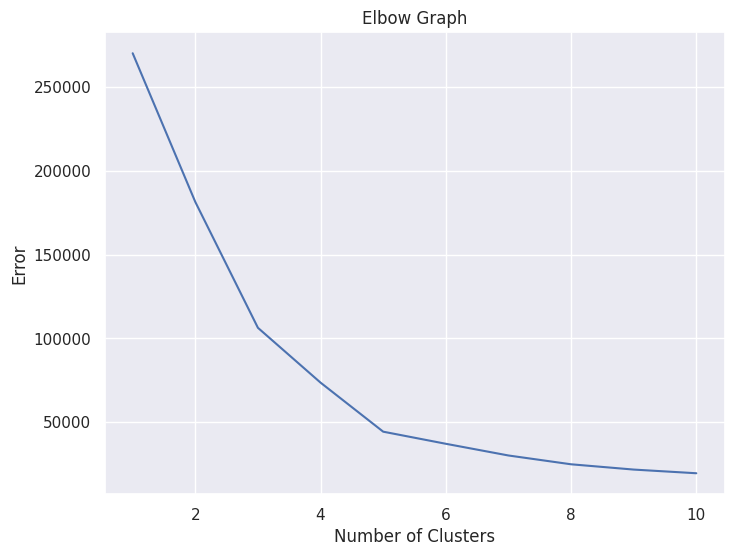

In [42]:
sns.set()
plt.plot(range(1,11),error)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

In [43]:
model = KMeans(n_clusters = 5)
df['cluster'] = model.fit_predict(df)

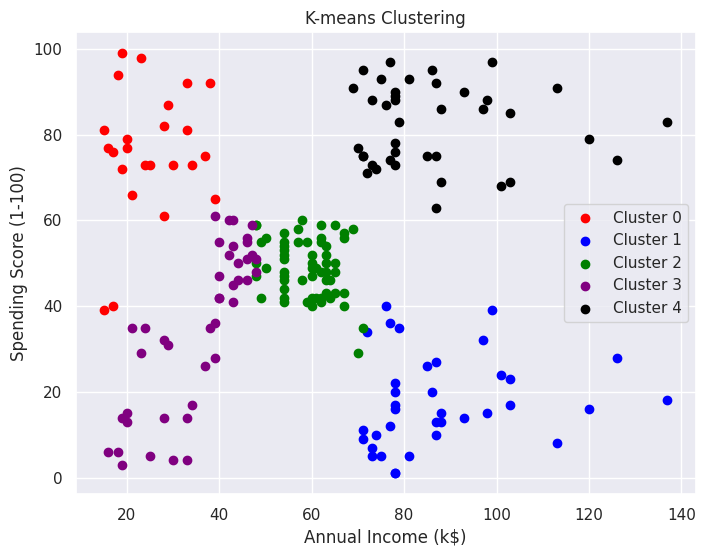

In [44]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'purple','black']

for cluster_label, color in zip(range(5), colors):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=color, label=f'Cluster {cluster_label}')

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

